In [43]:
import pandas as pd
from Code.Load import Loaded_Data as ld
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
import warnings
warnings.filterwarnings('ignore')
import random
import seaborn as sns
from sktime.split import temporal_train_test_split
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import acf, pacf
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sktime.forecasting.arima import AutoARIMA
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

In [44]:
combined = ld.combined_data
combined

,regionid,sizerank,regionname,regiontype,region,statename,new construction sales count,new construction mean sales price ($),mean days to pending,mean price cut ($),mean price cut (%),median sales price ($),percent sold above list (%),zillow home value index,zillow observed rent index,date
date,,,,,,,,,,,,,,,,
2000-01-31,102001,0,United States,country,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121733.968492,NaN,2000-01-31
2000-01-31,395046,718,"Safford, AZ",msa,West,AZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97162.604619,NaN,2000-01-31
2000-01-31,395047,233,"Saginaw, MI",msa,Midwest,MI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79377.644022,NaN,2000-01-31
2000-01-31,394392,265,"Blacksburg, VA",msa,South,VA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92731.513340,NaN,2000-01-31
2000-01-31,395048,126,"Salem, OR",msa,West,OR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143090.338653,NaN,2000-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,395077,461,"Searcy, AR",msa,South,AR,228.0,NaN,45.0,8329.329847,0.034603,NaN,NaN,187361.749101,1109.375000,2024-03-31
2024-03-31,395078,15,"Seattle, WA",msa,West,WA,5294.0,NaN,28.0,31175.966105,0.031918,NaN,NaN,743574.164238,2193.734523,2024-03-31
2024-03-31,394380,232,"Bend, OR",msa,West,OR,774.0,NaN,54.0,27365.370860,0.028696,NaN,NaN,671260.138959,2262.361243,2024-03-31


<Axes: ylabel='date'>

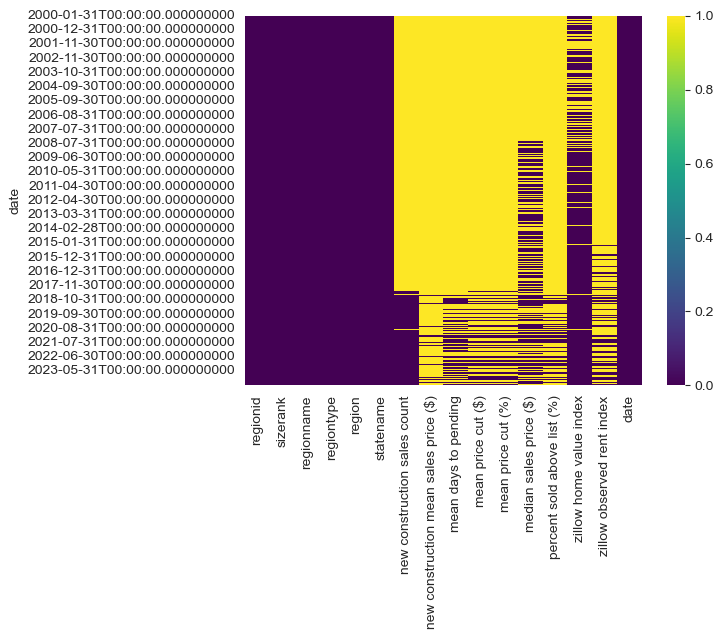

In [45]:
sns.heatmap(ld.combined_data.isnull(), cbar=True, cmap='viridis')

In [46]:
new_con_sales_price = ld.new_construction_mean_sales_price
new_con_sales_price

,regionid,sizerank,regionname,regiontype,statename,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29
0,102001,0,United States,country,NaN,4.144814e+05,3.965338e+05,4.085005e+05,4.056592e+05,4.240465e+05,...,5.340700e+05,5.433041e+05,5.377370e+05,5.435401e+05,5.441634e+05,5.528314e+05,5.398009e+05,5.482996e+05,5.418011e+05,5.340584e+05
1,394913,1,"New York, NY",msa,NY,8.180735e+05,8.395916e+05,8.536231e+05,8.901915e+05,8.855233e+05,...,1.159706e+06,1.275895e+06,1.150620e+06,1.245319e+06,1.131144e+06,1.178282e+06,1.236628e+06,1.188113e+06,1.074010e+06,1.190906e+06
2,753899,2,"Los Angeles, CA",msa,CA,1.308642e+06,1.176748e+06,1.380173e+06,1.316500e+06,1.452454e+06,...,1.902235e+06,2.003955e+06,1.869173e+06,2.000229e+06,2.162873e+06,2.011191e+06,1.793027e+06,1.795323e+06,2.004975e+06,1.784561e+06
3,394463,3,"Chicago, IL",msa,IL,5.878497e+05,5.627078e+05,4.910892e+05,6.110676e+05,6.169371e+05,...,6.214410e+05,6.107898e+05,6.100394e+05,5.712161e+05,5.894585e+05,5.811009e+05,6.624802e+05,6.232083e+05,6.188757e+05,6.224019e+05
4,394514,4,"Dallas, TX",msa,TX,3.634632e+05,3.817313e+05,3.877844e+05,3.774744e+05,4.058407e+05,...,5.085527e+05,5.104667e+05,5.069385e+05,5.180489e+05,5.222101e+05,5.005329e+05,5.074470e+05,5.066434e+05,4.907940e+05,4.786487e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,395063,522,"Sanford, NC",msa,NC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.218508e+05,3.251404e+05,3.419151e+05
168,394309,526,"Albemarle, NC",msa,NC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.699845e+05
169,845162,535,"Granbury, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.204578e+05
170,395122,576,"St. Marys, GA",msa,GA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.970484e+05,4.140215e+05,3.485341e+05,3.752479e+05,3.913863e+05,3.968337e+05,4.107808e+05


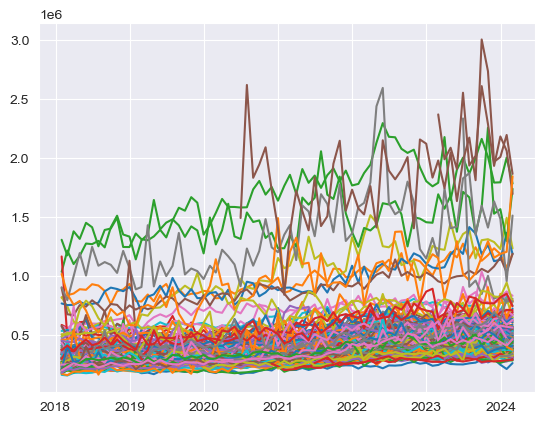

In [47]:
cities = ld.new_construction_mean_sales_price['regionname'].unique().tolist()
for city in cities:
    plt.plot(combined[combined['regionname'] == city]['new construction mean sales price ($)'], label=city)
plt.show()

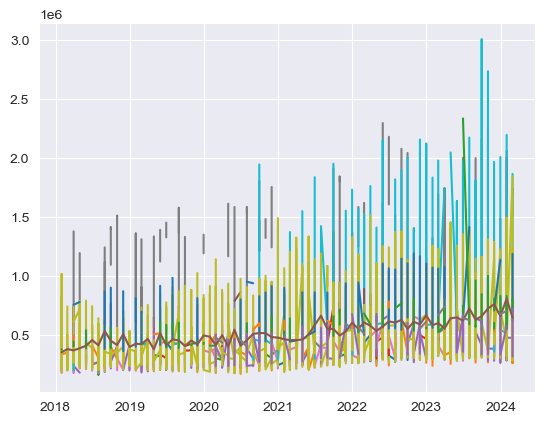

In [48]:
states = combined['statename'].unique().tolist()
for state in states:
    plt.plot(combined[combined['statename'] == state]['new construction mean sales price ($)'], label=state)
plt.show()

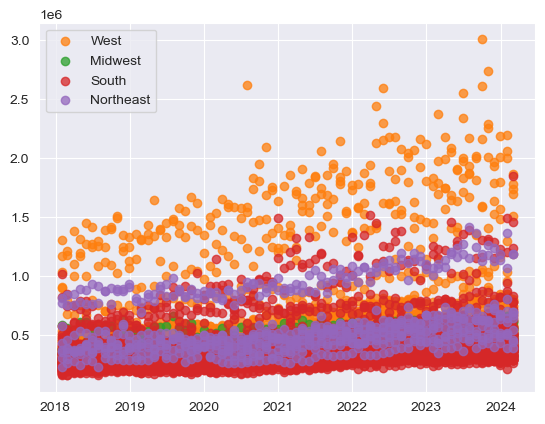

In [49]:
regions = combined['region'].unique().tolist()
for region in regions:
    plt.scatter(combined[combined['region'] == region].index,combined[combined['region'] == region]['new construction mean sales price ($)'], label=region, alpha=0.75)
plt.legend()
plt.show()

In [50]:
combined.describe()

,regionid,sizerank,new construction sales count,new construction mean sales price ($),mean days to pending,mean price cut ($),mean price cut (%),median sales price ($),percent sold above list (%),zillow home value index,zillow observed rent index,date
count,264034.000000,264034.000000,6.655300e+04,1.002400e+04,35970.000000,29001.000000,29068.000000,1.097100e+05,31023.000000,2.111790e+05,35889.000000,264034
mean,417303.638270,463.406183,2.510082e+03,4.634309e+05,48.751626,16875.925128,0.040531,1.906284e+05,0.292654,1.760417e+05,1282.439618,2012-04-02 15:44:05.904694528
min,102001.000000,0.000000,4.000000e+00,1.599555e+05,7.000000,2884.733622,0.014182,3.850000e+04,0.000000,2.796741e+04,472.376387,2000-01-31 00:00:00
25%,394549.000000,231.000000,1.520000e+02,3.220068e+05,29.000000,9894.904447,0.033005,1.195000e+05,0.174069,1.073233e+05,957.366409,2006-02-28 00:00:00
50%,394802.000000,462.000000,3.180000e+02,3.984149e+05,44.000000,12897.923375,0.039182,1.567290e+05,0.263307,1.431134e+05,1162.028328,2012-04-30 00:00:00
75%,395055.000000,693.000000,7.800000e+02,5.124273e+05,63.000000,18109.406077,0.046802,2.201670e+05,0.386173,2.038013e+05,1439.660291,2018-04-30 00:00:00
max,845172.000000,939.000000,1.733387e+06,3.004595e+06,258.000000,156702.285078,0.157683,1.530000e+06,0.858032,1.671601e+06,13377.712333,2024-03-31 00:00:00
std,90399.478548,269.174886,4.069910e+04,2.588003e+05,25.687137,13351.685650,0.010321,1.199198e+05,0.152387,1.165423e+05,601.771206,NaN


In [53]:
combined = combined.rename(columns={'date':'datecol'})
combined

,regionid,sizerank,regionname,regiontype,region,statename,new construction sales count,new construction mean sales price ($),mean days to pending,mean price cut ($),mean price cut (%),median sales price ($),percent sold above list (%),zillow home value index,zillow observed rent index,datecol
date,,,,,,,,,,,,,,,,
2000-01-31,102001,0,United States,country,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121733.968492,NaN,2000-01-31
2000-01-31,395046,718,"Safford, AZ",msa,West,AZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97162.604619,NaN,2000-01-31
2000-01-31,395047,233,"Saginaw, MI",msa,Midwest,MI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79377.644022,NaN,2000-01-31
2000-01-31,394392,265,"Blacksburg, VA",msa,South,VA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92731.513340,NaN,2000-01-31
2000-01-31,395048,126,"Salem, OR",msa,West,OR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143090.338653,NaN,2000-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,395077,461,"Searcy, AR",msa,South,AR,228.0,NaN,45.0,8329.329847,0.034603,NaN,NaN,187361.749101,1109.375000,2024-03-31
2024-03-31,395078,15,"Seattle, WA",msa,West,WA,5294.0,NaN,28.0,31175.966105,0.031918,NaN,NaN,743574.164238,2193.734523,2024-03-31
2024-03-31,394380,232,"Bend, OR",msa,West,OR,774.0,NaN,54.0,27365.370860,0.028696,NaN,NaN,671260.138959,2262.361243,2024-03-31


In [56]:
grouped_new_con = combined[['region','datecol', 'new construction mean sales price ($)']].dropna().groupby(by=['region', 'datecol']).mean()
grouped_new_con = grouped_new_con.reset_index()
grouped_new_con

,region,datecol,new construction mean sales price ($)
0,Midwest,2018-01-31,329799.577658
1,Midwest,2018-02-28,332852.537101
2,Midwest,2018-03-31,329798.658201
3,Midwest,2018-04-30,337395.488087
4,Midwest,2018-05-31,347662.763194
...,...,...,...
291,West,2023-10-31,868162.916962
292,West,2023-11-30,782149.709942
293,West,2023-12-31,809007.235843
294,West,2024-01-31,773261.579264


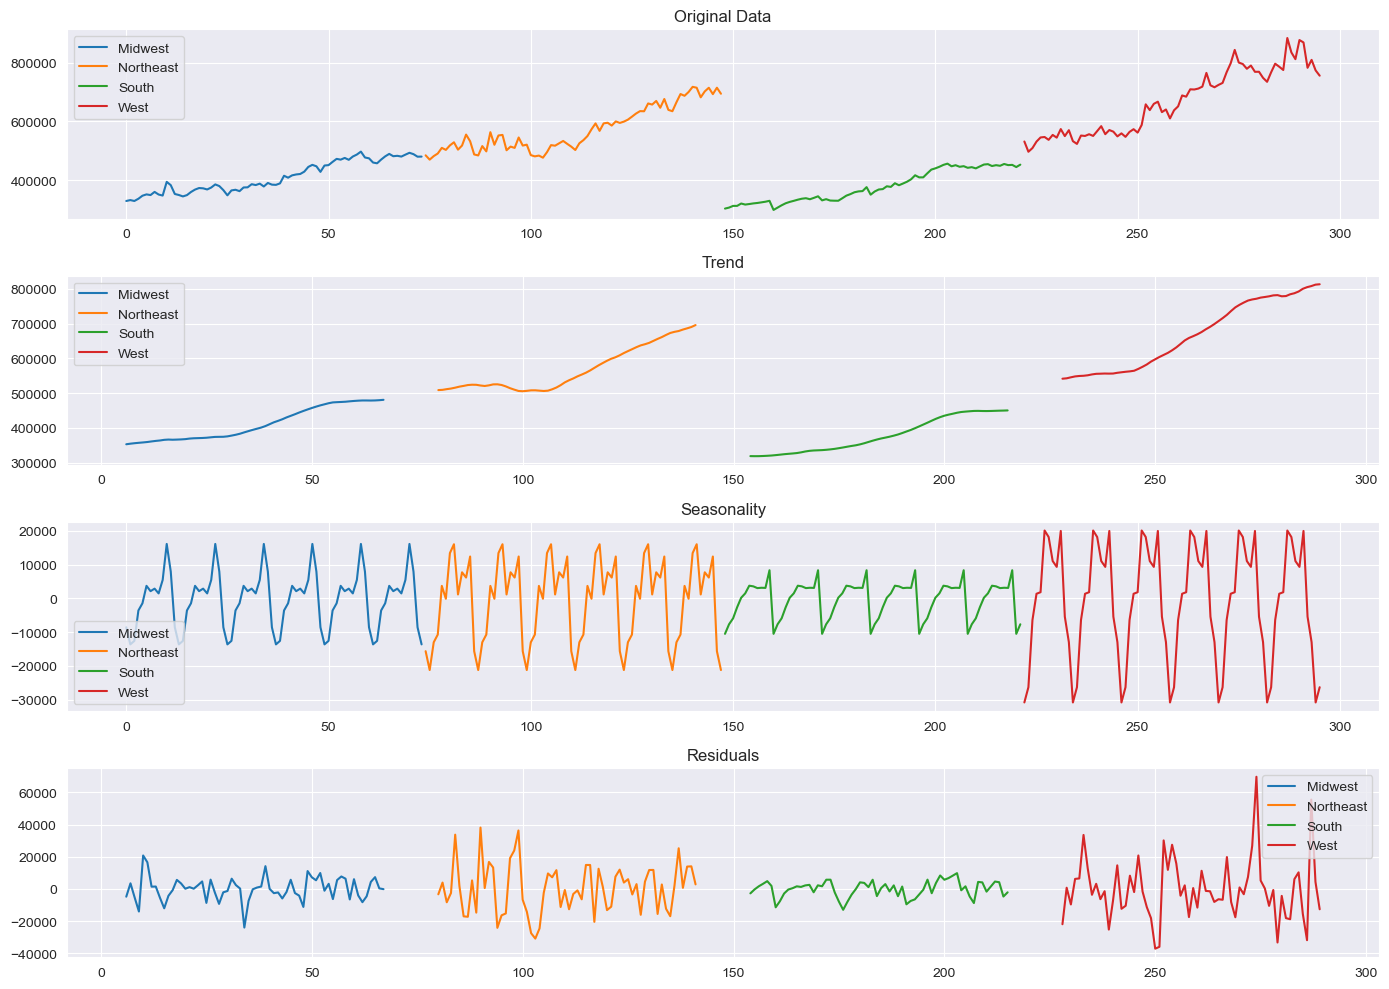

In [60]:
plt.figure(figsize=(14, 10))
ax1 = plt.subplot(411)
ax1.set_title('Original Data')
ax2 = plt.subplot(412)
ax2.set_title('Trend')
ax3 = plt.subplot(413)
ax3.set_title('Seasonality')
ax4 = plt.subplot(414)
ax4.set_title('Residuals')
for region in grouped_new_con['region'].unique():
    region_data = grouped_new_con[grouped_new_con['region'] == region]
    decomposition = sm.tsa.seasonal_decompose(region_data['new construction mean sales price ($)'], model='additive', period=12)
    ax1.plot(region_data['new construction mean sales price ($)'], label=region)
    ax2.plot(decomposition.trend.index, decomposition.trend, label=region)
    ax3.plot(decomposition.seasonal.index, decomposition.seasonal, label=region)
    ax4.plot(decomposition.resid.index, decomposition.resid, label=region)

ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

plt.tight_layout()
plt.show()

In [66]:
def plot_acf_pacf_for_dataframe(dataframe, lags=40):
    """
    Plots ACF and PACF for each column in the dataframe.
    
    Parameters:
    - dataframe: The dataframe with time series data in each column.
    - lags: Number of lags to include in the plots.
    """
    
    acf_pacf_data = {}
    print(dataframe.columns)
    for column in dataframe:
        time_series = dataframe[column]

        acf_data = acf(time_series, nlags=lags)
        pacf_data = pacf(time_series, nlags=lags, method='ywm')
        acf_pacf_data[column] = (acf_data, pacf_data)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

        plot_acf(time_series, lags=lags, ax=ax1)
        ax1.set_title(f'{column} - Autocorrelation Function')

        plot_pacf(time_series, lags=lags, method='ywm', ax=ax2)
        ax2.set_title(f'{column} - Partial Autocorrelation Function')

        plt.show()
        
    return acf_pacf_data

In [67]:
def run_stationarity_tests(dataframe, KPSS_TREND=True):
    results = []
    if KPSS_TREND:
        kp_r = 'ct'
    else:
        kp_r = 'c'
    for col in dataframe.columns:
        ts = dataframe[col]
        adf_test = adfuller(ts, autolag='AIC')
        adf_output = {
            'Test': 'ADF', 'Variable': col,
            'Test Statistic': adf_test[0],
            'p-value': adf_test[1],
            'Used Lag': adf_test[2],
            'Number of Observations': adf_test[3],
        }
        adf_output.update({f'Critical Value ({key})': value for key, value in adf_test[4].items()})
        results.append(adf_output)
        kpss_test = kpss(ts, regression=kp_r, nlags='auto')
        kpss_output = {
            'Test': 'KPSS', 'Variable': col,
            'Test Statistic': kpss_test[0],
            'p-value': kpss_test[1],
            'Used Lag': kpss_test[2],
        }
        kpss_output.update({f'Critical Value ({key})': value for key, value in kpss_test[3].items()})
        results.append(kpss_output)
  
    results_df = pd.DataFrame(results)
    
    print("ADF Test Assumptions: The data has an autoregressive structure and the null hypothesis is that the time series is non-stationary or has a unit root.")
    print("KPSS Test Assumptions: The null hypothesis is that the time series is stationary around a trend or constant (depending on the specified regression).")
    
    return results_df

Index(['new construction mean sales price ($)'], dtype='object')


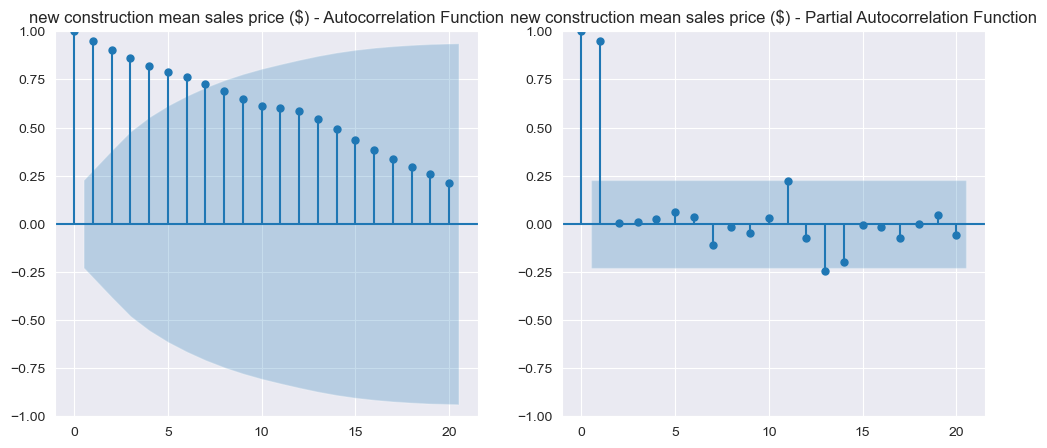

Index(['new construction mean sales price ($)'], dtype='object')


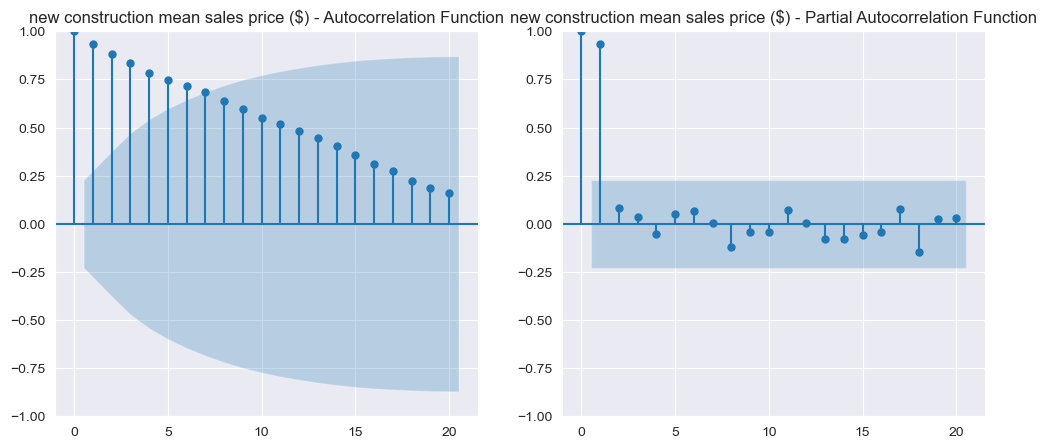

Index(['new construction mean sales price ($)'], dtype='object')


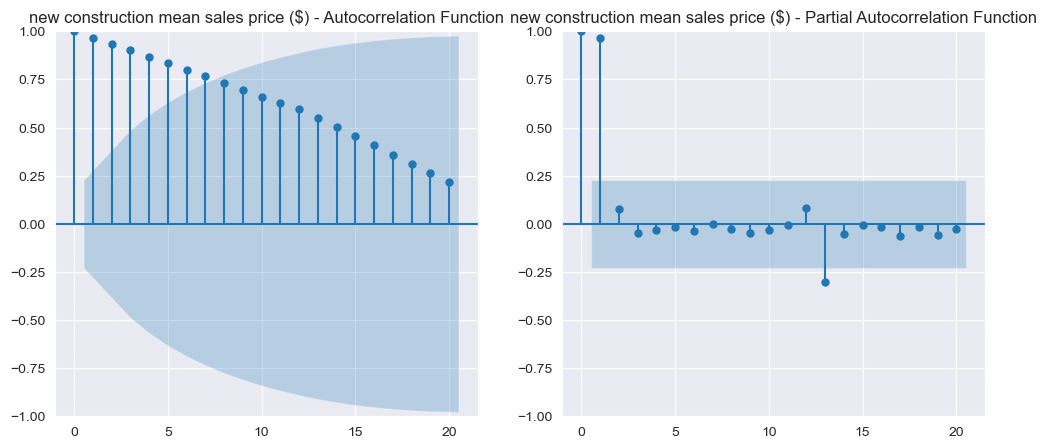

Index(['new construction mean sales price ($)'], dtype='object')


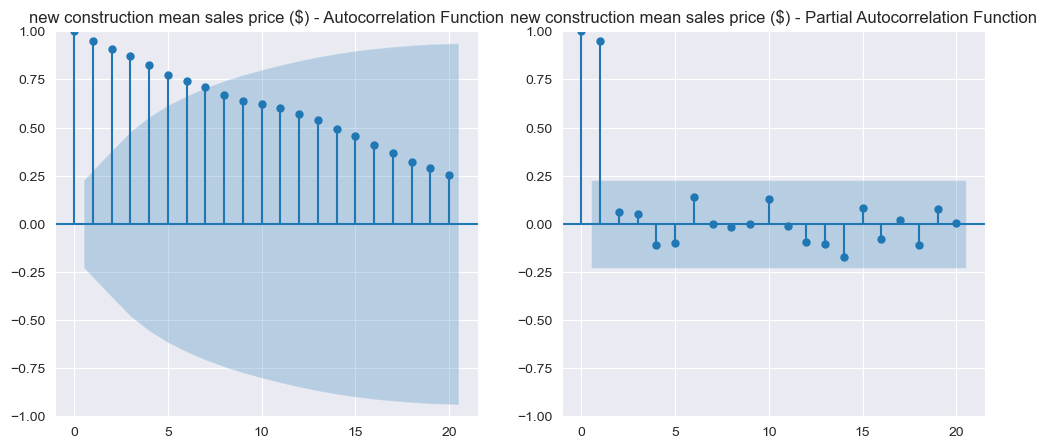

In [71]:
for region in grouped_new_con['region'].unique():
    plot_acf_pacf_for_dataframe(pd.DataFrame(grouped_new_con[grouped_new_con['region']==region]['new construction mean sales price ($)']), lags=20)

In [73]:
for region in grouped_new_con['region'].unique():
    run_stationarity_tests(pd.DataFrame(grouped_new_con[grouped_new_con['region']==region]['new construction mean sales price ($)']))

ADF Test Assumptions: The data has an autoregressive structure and the null hypothesis is that the time series is non-stationary or has a unit root.
KPSS Test Assumptions: The null hypothesis is that the time series is stationary around a trend or constant (depending on the specified regression).
ADF Test Assumptions: The data has an autoregressive structure and the null hypothesis is that the time series is non-stationary or has a unit root.
KPSS Test Assumptions: The null hypothesis is that the time series is stationary around a trend or constant (depending on the specified regression).
ADF Test Assumptions: The data has an autoregressive structure and the null hypothesis is that the time series is non-stationary or has a unit root.
KPSS Test Assumptions: The null hypothesis is that the time series is stationary around a trend or constant (depending on the specified regression).
ADF Test Assumptions: The data has an autoregressive structure and the null hypothesis is that the time se